<a href="https://colab.research.google.com/github/ashwinigit123/CSE6324Team5/blob/main/Iteration2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ashwinigit123/CSE6324Team5/main/MATC_Projects.csv'
df1 = pd.read_csv(url)
df1.head()

,id,title,author_name,mathworks_url,summary,content,category,author_uri,published,updated,no_of_comments,no_of_ratings,average_rating,downloads,download_link,license,model_files,num_model_file
0,261,RF Design and Analysis,Jackson Harvey,https://www.mathworks.com/matlabcentral/fileex...,"A collection of functions, scripts, & Simulink...",<p>This is a collection of MATLAB functions an...,NaN,https://www.mathworks.com/matlabcentral/profil...,2001-07-23 12:51:25.000000,2001-07-23 12:51:25.000000,18,46,4,3,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2001, Jackson Harvey\nAll rights...","RF.mdl,",1
1,266,smxl,Giampiero Campa,https://www.mathworks.com/matlabcentral/fileex...,The Simulink MatriX Library (SMXL) - a collect...,<p>SMXL (Simulink MatriX Library) it's a power...,NaN,https://www.mathworks.com/matlabcentral/profil...,2007-10-23 08:01:38.000000,2007-10-23 08:01:38.000000,3,4,4,1,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 1999, Giampiero Campa\nAll right...","smxl.mdl,examples/vrsvdex.mdl,examples/vrranke...",15
2,268,trimmod,Joerg Buchholz,https://www.mathworks.com/matlabcentral/fileex...,TrimMod finds the trim point (equilibrium) of ...,<p>TrimMod finds the trim point (equilibrium) ...,NaN,https://www.mathworks.com/matlabcentral/profil...,2017-03-17 11:54:23.000000,2017-03-17 11:54:23.000000,1,2,5,2,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2009, Joerg Buchholz\nAll rights...",trimmod/trimtest/trimtest_with_vector_outport....,2
3,722,Bluetooth modulation and frequency hopping,Stuart McGarrity,https://www.mathworks.com/matlabcentral/fileex...,Bluetooth modulation and frequency hopping,<p>Simulink® model of a simple Bluetooth® wire...,"bluetooth,frequency,hopping,network,wireless,b...",https://www.mathworks.com/matlabcentral/profil...,2016-09-01 15:00:04.000000,2016-09-01 15:00:04.000000,21,22,4,12,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2001, The MathWorks, Inc.\nAll r...","bluetooth.mdl,R12.1 Original Version/bluetooth...",2
4,724,DTMF generator and receiver,Stuart McGarrity,https://www.mathworks.com/matlabcentral/fileex...,DTMF generator and receiver,<p>Simulink® model of a dual-tone multi-freque...,"communications,dtmf,dual tone,multi frequency,...",https://www.mathworks.com/matlabcentral/profil...,2016-09-01 15:00:05.000000,2016-09-01 15:00:05.000000,11,27,3,2,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2001, The MathWorks, Inc.\nAll r...","dtmf.mdl,R12.1 Original Version/dtmf.mdl,",2


In [2]:
df1['summary']

0       A collection of functions, scripts, & Simulink...
1       The Simulink MatriX Library (SMXL) - a collect...
2       TrimMod finds the trim point (equilibrium) of ...
3              Bluetooth modulation and frequency hopping
4                             DTMF generator and receiver
                              ...                        
2719    A very basic example of physical modeling in S...
2720    I2C sensors can be read directly in Simulink u...
2721    This is the Ball on Plate Simscape Model, Cont...
2722                                  Single Phase dimmer
2723    ِABB Automatic Generation Control (frequency r...
Name: summary, Length: 2724, dtype: object

In [3]:
df1['category'].isnull().sum()

88

In [4]:
df1.shape

(2724, 18)

In [5]:
df1 = df1.dropna()
df1.shape

(2636, 18)

In [6]:
df1['category'].isnull().sum()

0

In [7]:
# removing everything except alphabets`
df1['cat'] = df1['category'].str.replace("[^a-zA-Z#]", " ")


In [8]:
df1['cat']

3       bluetooth frequency hopping network wireless b...
4       communications dtmf dual tone multi frequency ...
5       cdma is  a phy pn pn string power control reve...
6       is  a call processing mobile phone is  a call ...
7            b bluetooth cvsd frequency hopping matlab...
                              ...                        
2717    electrical vehicle ev fast battery charging fu...
2718                                  buck dc synchronous
2719                        longitudinal vehicle dynamics
2720    accelerometer arduino deflection i c mma     m...
2721      ball on plate diagnostic pid sfunction simscape
Name: cat, Length: 2636, dtype: object

In [9]:
# removing null fields
df1 = df1[df1['cat'].notnull()]
# removing short words
#news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# make all text lowercase
#news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [10]:
df1['cat'] = df1['cat'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df1['cat'] = df1['cat'].apply(lambda x: x.lower())

In [11]:
df1['cat']

3       bluetooth frequency hopping network wireless b...
4       communications dtmf dual tone multi frequency ...
5       cdma string power control reverse traffic simu...
6       call processing mobile phone call processing m...
7       bluetooth cvsd frequency hopping matlab simuli...
                              ...                        
2717    electrical vehicle fast battery charging fuzzy...
2718                                     buck synchronous
2719                        longitudinal vehicle dynamics
2720    accelerometer arduino deflection real time sim...
2721             ball plate diagnostic sfunction simscape
Name: cat, Length: 2636, dtype: object

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
tokenized_doc = df1['cat'].apply(lambda x: x.split())
print(tokenized_doc)

3       [bluetooth, frequency, hopping, network, wirel...
4       [communications, dtmf, dual, tone, multi, freq...
5       [cdma, string, power, control, reverse, traffi...
6       [call, processing, mobile, phone, call, proces...
7       [bluetooth, cvsd, frequency, hopping, matlab, ...
                              ...                        
2717    [electrical, vehicle, fast, battery, charging,...
2718                                  [buck, synchronous]
2719                    [longitudinal, vehicle, dynamics]
2720    [accelerometer, arduino, deflection, real, tim...
2721       [ball, plate, diagnostic, sfunction, simscape]
Name: cat, Length: 2636, dtype: object


In [14]:
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
print(tokenized_doc)

3       [bluetooth, frequency, hopping, network, wirel...
4       [communications, dtmf, dual, tone, multi, freq...
5       [cdma, string, power, control, reverse, traffi...
6       [call, processing, mobile, phone, call, proces...
7       [bluetooth, cvsd, frequency, hopping, matlab, ...
                              ...                        
2717    [electrical, vehicle, fast, battery, charging,...
2718                                  [buck, synchronous]
2719                    [longitudinal, vehicle, dynamics]
2720    [accelerometer, arduino, deflection, real, tim...
2721       [ball, plate, diagnostic, sfunction, simscape]
Name: cat, Length: 2636, dtype: object


In [15]:
detokenized_doc = []
for i in range(len(tokenized_doc)):
    if i in tokenized_doc:
        t = ' '.join(tokenized_doc[i])
        detokenized_doc.append(t)
print(detokenized_doc)

['bluetooth frequency hopping network wireless bluetooth frequency hopping network wireless bluetooth hopping wireless bluetooth frequency frequency bluetooth', 'communications dtmf dual tone multi frequency simulink dtmf dual tone', 'cdma string power control reverse traffic simulink stateflow wireless cdma cdma power control power control string', 'call processing mobile phone call processing mobile phone seminar wireless call processing mobile phone call processing mobile phone', 'bluetooth cvsd frequency hopping matlab simulink voice wireless bluetooth cvsd frequency hopping matlab simulink voice bluetooth bluetooth', 'fuzzy neural networks suren adaptive neural networks adaline adaptive neural networks ebpa fuzzy logic mran neural networks neural networks adaline neural networks', 'filters filters signal signal processing time frequency wavelets wavelets simulink', 'marine simulation submarine underwater vehicle', 'flow fluid hydraulic line pipeline pressure simulation flow fluid 

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf vectorizer of scikit learn
vectorizer = TfidfVectorizer(stop_words=stop_words, max_df = 0.5, use_idf = True, ngram_range=(1,3))
X = vectorizer.fit_transform(detokenized_doc)
print(X.shape) # check shape of the document-term matrix
terms = vectorizer.get_feature_names()

(2565, 23134)


In [17]:
print(terms)

['abhishek', 'acac', 'acac conversion', 'acac conversion control', 'acac converter', 'acac converter cycloconverter', 'acac converter electric', 'acac converter three', 'acac converter thyristor', 'academic', 'academic cyberphysical', 'academic cyberphysical system', 'acceleration', 'acceleration acceleration', 'acceleration acceleration auto', 'acceleration auto', 'acceleration auto automotive', 'accelerometer', 'accelerometer arduino', 'accelerometer identification', 'accelerometer identification mems', 'accelerometre', 'accelerometre arduino', 'accelerometre arduino gyroscope', 'access', 'access ofdma', 'access ofdma ofdma', 'accuracy', 'accuracy accurate', 'accuracy accurate modeling', 'accuracy dcdcconverter', 'accuracy dcdcconverter interpolation', 'accurate', 'accurate modeling', 'accurate modeling article', 'acdc', 'acdc aerospace', 'acdc aerospace diode', 'acdc boost', 'acdc boost rectifier', 'acdc buck', 'acdc buck electric', 'acdc converter', 'acdc converter rectifier', 'acd

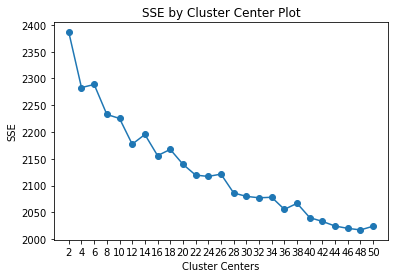

In [31]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
       # print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X, 50)

In [32]:
from sklearn.cluster import KMeans
import numpy as np
num_clusters = 40
km = KMeans(n_clusters=num_clusters)
km.fit(X)
#clusters = km.labels_.tolist()
clusters = km.predict(X)
labels = np.unique(clusters)
print(np.unique(clusters))
print(km.cluster_centers_)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00362509 0.00408384 0.        ]
 [0.         0.00019321 0.         ... 0.00182778 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.00525047]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [33]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 response
 step
 step response
 sine response
 sine
 series
 series step response
 series step
 model response
 ramp step
 ramp
 response sinusoidal
 sine response sinusoidal
 sinusoidal
 circuit sine response
 circuit sine
 model
 analysis transients
 transient analysis
 response transient analysis
Cluster 1:
 inverter
 inverter power
 inverter power electronics
 power
 power electronics
 electronics
 control
 inverter simulation
 drives inverter
 drives
 power electronics simulink
 electronics simulink
 simulation
 drives inverter power
 boost inverter
 multilevel
 multilevel inverter power
 inverter control
 control power
 bridge inverter
Cluster 2:
 simulink
 control
 simulation
 arduino
 power
 system
 model
 design
 inverter
 simulation simulink
 control design
 measurement
 modeling
 solar
 phase
 frequency
 simulink simulink
 modulation
 controller
 fuzzy
Cluster 3:
 power
 control
 electronics
 power electronics
 control power
 control power e

In [34]:
from sklearn.utils.extmath import randomized_svd
U, Sigma, VT = randomized_svd(X, n_components=6, n_iter=100,
                              random_state=122)


In [22]:
pip install umap-learn


     |████████████████████████████████| 80 kB 3.9 MB/s 
     |████████████████████████████████| 1.1 MB 33.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=5b2e2cf8468dbcd48da07de4689b92a90374f5248c7a226deadbd7f205fdadc9
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=72faa23f36df8d4862ba7500ae3cfbd583e64daaf4b5c71c91e8d30d6bb8ce87
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


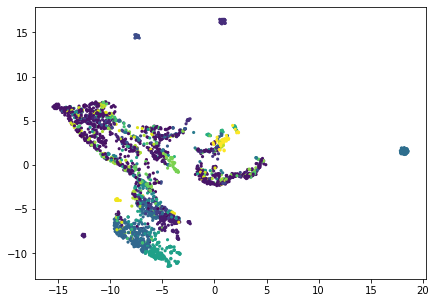

In [35]:
import umap
import seaborn as sns
X_topics=U*Sigma
embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=12).fit_transform(X_topics)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = clusters,
s = 10, # size
edgecolor='none'
)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)